# ML Regression Models
- This Jupyter Notebook compares the prediction errors of different models.
   
 
- Linear Regression (LR), Random Forest (RF) Regression, Gradient Boosting (GB) Regression, Support Vector Regression (SVR), Neural Network (NN) Regression, Gaussian Process (GP) Regression
 
 
- Ensemble Learning: use the RF, GB, SVR, NN, GP as the base learner, and a secondary RF as meta learner (with the output of base learner as inputs)

Written by Suo Wang and Zhe Liu, Chongyang Zhi et al.

Tested with the packages as follows:
`numpy 1.21.5`
`pandas 1.4.2`
`matplotlib 3.5.1`
`shap 0.41.0`
`sklearn 1.0.2`
`GPy 1.10.0`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Import Data and  Pre-Processing

In [3]:
df_exp_data = pd.read_csv('../data/experimental_data_maxPCE_ratio.csv')
df_exp_data

,Full Name,Abbreviation,smiles,Concentration (mg/mL),C atom,H atom,N atom,F atom,O atom,Ipc,...,Complexity,MolLogP,Voc(V)_mean,Jsc(mA/cm2)_mean,FF(%)_mean,PCE(%)_mean,Voc(V)_max,Jsc(mA/cm2)_max,FF(%)_max,ratio
0,n-Butylammonium iodide,n-BAI,[I-].CCCC[NH3+],5.0,4,12,1,0,0,11.245112,...,15.02,-2.97,1.080,22.23,68.99,16.59,1.120,23.33,73.43,1.060159
1,Cyclohexylmethylammonium iodide,CHMAI,[I-].[NH3+]CC1CCCCC1,5.0,7,16,1,0,0,91.367577,...,59.94,-2.19,1.050,21.89,70.54,16.28,1.080,22.96,75.57,1.061862
2,Ethylammonium iodide,EAI,[I-].CC[NH3+],5.0,2,8,1,0,0,2.754888,...,6.00,-3.75,1.070,24.50,71.70,18.88,1.090,25.62,74.04,1.063231
3,Ethylammonium iodide,EAI,[I-].CC[NH3+],7.5,2,8,1,0,0,2.754888,...,6.00,-3.75,1.090,22.40,69.38,16.84,1.110,24.56,75.72,1.059511
4,Ethylammonium iodide,EAI,[I-].CC[NH3+],10.0,2,8,1,0,0,2.754888,...,6.00,-3.75,1.080,23.14,69.40,17.41,1.100,25.88,73.39,1.069075
5,Ethylammonium iodide,EAI,[I-].CC[NH3+],12.5,2,8,1,0,0,2.754888,...,6.00,-3.75,1.090,23.05,62.95,15.86,1.100,25.48,66.76,0.972370
6,Ethylammonium iodide,EAI,[I-].CC[NH3+],15.0,2,8,1,0,0,2.754888,...,6.00,-3.75,1.100,16.55,51.51,9.45,1.140,18.37,63.52,0.693943
7,Guanidinium iodide,GAI,[I-].NC([NH3+])=N,5.0,1,6,3,0,0,3.245112,...,29.87,-4.87,1.040,21.54,68.96,15.51,1.070,23.32,76.31,0.943146
8,4-Fluoro-phenethylammonium iodide,4-F-PEAI,[I-].[NH3+]CCc1ccc(F)cc1,5.0,8,11,1,1,0,210.075617,...,197.75,-2.39,1.060,23.44,74.13,18.39,1.070,25.27,76.75,1.092291
9,2-Fluoro-phenethylammonium iodide,2-F-PEAI,[I-].[NH3+]CCc1ccccc1F,1.0,8,11,1,1,0,213.811624,...,215.00,-2.39,1.120,22.40,71.13,17.81,1.130,22.87,73.13,0.936784


#### Remove two features that are correlated strongly with other features (i.e., # of Heavy Atom, TPSA)

In [29]:
df_exp_data = df_exp_data.drop(columns='Heavy atom')
df_exp_data = df_exp_data.drop(columns='TPSA')

In [30]:
X_input = df_exp_data.iloc[:46,3:16]
X_input.iloc[:,0] = np.around(X_input.iloc[:,0]/X_input['Molecular weight']*1000, 2) ## Convert mg/mL to μmol/mL
X_input.rename(columns={"Concentration (mg/mL)": "Concentration (μmol/mL)"}, inplace=True)
X_input.head(5)

,Concentration (umol/mL),C atom,H atom,N atom,F atom,O atom,Ipc,Molecular weight,Hydrogen bond donor,Hydrogen bond acceptor,Rotatable bond,Complexity,MolLogP
0,24.87,4,12,1,0,0,11.245112,201.05,1,0,2,15.02,-2.97
1,20.74,7,16,1,0,0,91.367577,241.12,1,0,1,59.94,-2.19
2,28.90,2,8,1,0,0,2.754888,173.00,1,0,0,6.00,-3.75
3,43.35,2,8,1,0,0,2.754888,173.00,1,0,0,6.00,-3.75
4,57.80,2,8,1,0,0,2.754888,173.00,1,0,0,6.00,-3.75


In [31]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
X_scaler.fit(X_input)
X_input_norm = X_scaler.transform(X_input)
X_input_norm = pd.DataFrame(X_input_norm, columns = X_input.columns)
X_input_norm.head(5)

,Concentration (umol/mL),C atom,H atom,N atom,F atom,O atom,Ipc,Molecular weight,Hydrogen bond donor,Hydrogen bond acceptor,Rotatable bond,Complexity,MolLogP
0,0.254670,0.333333,0.428571,0.0,0.0,0.0,0.016879,0.215653,0.0,0.0,0.333333,0.023847,0.529248
1,0.204893,0.666667,0.714286,0.0,0.0,0.0,0.176165,0.523718,0.0,0.0,0.166667,0.142604,0.746518
2,0.303242,0.111111,0.142857,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.311978
3,0.477401,0.111111,0.142857,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.311978
4,0.651561,0.111111,0.142857,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.311978


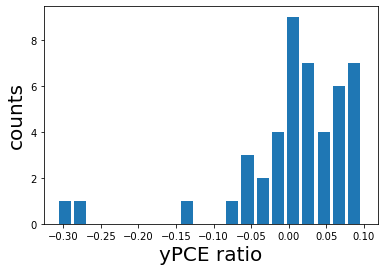

In [33]:
# The improvement ratio of device PCE are loaded as y
y_PCE = df_exp_data.iloc[:46,-1]-1

# Show the PCE ratio histogram
plt.hist(y_PCE, width = (max(y_PCE)-min(y_PCE))/(20+5), bins =20)
plt.ylabel('counts', fontsize = 20)
plt.xlabel('yPCE ratio', fontsize = 20)
plt.show()

## 2. ML Model Selection and Prediction Errors

#### A simple visulization functions to compare true and predicted y values

In [34]:
def prediction_vs_ground_truth_fig(y_train, y_train_hat, y_test, y_test_hat):
    from sklearn import metrics
    fontsize = 12
    plt.figure(figsize=(3.5,3))
    plt.style.use('default')
    plt.rc('xtick', labelsize=fontsize)
    plt.rc('ytick', labelsize=fontsize)
    plt.rcParams['font.family']="Arial"
    a = plt.scatter(y_train, y_train_hat, s=25)
    plt.plot([0.4-1, 1.2-1], [0.4-1, 1.2-1], 'k:', lw=1.5)
    plt.xlabel('Observation', fontsize=fontsize)
    plt.ylabel('Prediction', fontsize=fontsize)
    plt.xticks(np.array([0.4, 0.6, 0.8, 1.0, 1.2])-1)
    plt.yticks(np.array([0.4, 0.6, 0.8, 1.0, 1.2])-1)
    plt.tick_params(direction='in')
#     plt.text(450,80,'Scaled',family="Arial",fontsize=fontsize)
    plt.xlim([0.6-1,1.2-1]) 
    plt.ylim([0.6-1,1.2-1])
    plt.title(('Train RMSE: {:.2}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_hat))),\
               'Test RMSE: {:.2}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_hat)))), fontsize=fontsize)
    b = plt.scatter(y_test, y_test_hat, s=25)
    plt.legend((a,b),('Train','Test'),fontsize=fontsize,handletextpad=0.1,borderpad=0.1)
    plt.rcParams['font.family']="Arial"
    plt.tight_layout()
#     plt.savefig('../output/RF_nonstd_withPTEAI_1.png', dpi = 1200)
    plt.show()

In [35]:
## import some useful packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

### Linear Regression (LR)

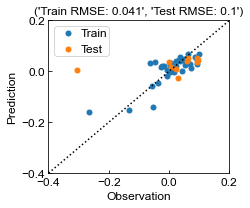

In [36]:
from sklearn.linear_model import LinearRegression
np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(X_input_norm, y_PCE, test_size=0.2)

# Fit to the training set
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

# Perform predictions on both training and test sets
y_train_pred = lr_reg.predict(X_train)
y_test_pred = lr_reg.predict(X_test)

# Visualize the results
prediction_vs_ground_truth_fig(y_train, y_train_pred, y_test, y_test_pred)

In [37]:
from sklearn.linear_model import LinearRegression

rmse_train_pred_list = []
rmse_test_pred_list = []
mae_train_pred_list = []
mae_test_pred_list = []
mape_train_pred_list = []
mape_test_pred_list = []
y_train_pred_list = []
y_test_pred_list = []
y_pred_list = []

for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X_input_norm, y_PCE, test_size=0.2)
    lr_reg = LinearRegression()
    lr_reg.fit(X_train, y_train)
    y_train_pred =  lr_reg.predict(X_train)
    y_test_pred = lr_reg.predict(X_test)
    y_pred = lr_reg.predict(X_input_norm)
    
    y_train_pred_list.append(y_train_pred)
    y_test_pred_list.append(y_test_pred)
    y_pred_list.append(y_pred)
    
    rmse_train_value = np.sqrt(mse(y_train, y_train_pred))
    rmse_test_value = np.sqrt(mse(y_test, y_test_pred))
    rmse_train_pred_list.append(rmse_train_value)
    rmse_test_pred_list.append(rmse_test_value)

    mae_train_value = mae(y_train, y_train_pred)
    mae_test_value = mae(y_test, y_test_pred)
    mae_train_pred_list.append(mae_train_value)
    mae_test_pred_list.append(mae_test_value)

    mape_train_value = mape(y_train, y_train_pred)
    mape_test_value = mape(y_test, y_test_pred)
    mape_train_pred_list.append(mape_train_value)
    mape_test_pred_list.append(mape_test_value)


print('RMSE Train: ',np.around(np.mean(rmse_train_pred_list),3))
print('RMSE Test: ',np.around(np.mean(rmse_test_pred_list),3))
print('^'*20)
print('MAE Train: ',np.around(np.mean(mae_train_pred_list),3))
print('MAE Test: ',np.around(np.mean(mae_test_pred_list),3))
print('^'*20)
print('norm. MAE Train: ',np.around(np.mean(mae_train_pred_list)/(max(y_PCE)-min(y_PCE)),3))
print('norm. MAE Test: ',np.around(np.mean(mae_test_pred_list)/(max(y_PCE)-min(y_PCE)),3))
print('^'*20)

print('RMSE std Train: ',np.around(np.std(rmse_train_pred_list),3))
print('RMSE std Test: ',np.around(np.std(rmse_test_pred_list),3))
print('^'*20)
print('MAE std Train: ',np.around(np.std(mae_train_pred_list),3))
print('MAE std Test: ',np.around(np.std(mae_test_pred_list),3))
print('^'*20)

RMSE Train:  0.049
RMSE Test:  0.112
^^^^^^^^^^^^^^^^^^^^
MAE Train:  0.035
MAE Test:  0.075
^^^^^^^^^^^^^^^^^^^^
norm. MAE Train:  0.087
norm. MAE Test:  0.185
^^^^^^^^^^^^^^^^^^^^
RMSE std Train:  0.007
RMSE std Test:  0.056
^^^^^^^^^^^^^^^^^^^^
MAE std Train:  0.004
MAE std Test:  0.029
^^^^^^^^^^^^^^^^^^^^


### Random Forest (RF) Regression

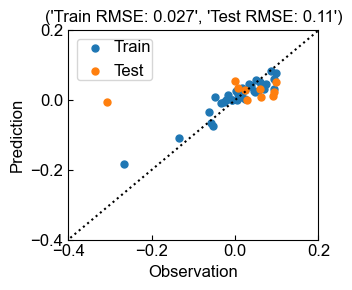

In [38]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(X_input_norm, y_PCE, test_size=0.2)

# Fit to the training set
rf_reg = RandomForestRegressor(n_estimators=20, max_depth=5)
rf_reg.fit(X_train, y_train)

# Perform predictions on both training and test sets
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

# Visualize the results
prediction_vs_ground_truth_fig(y_train, y_train_pred, y_test, y_test_pred)

In [39]:
from sklearn.ensemble import RandomForestRegressor

rmse_train_pred_list = []
rmse_test_pred_list = []
mae_train_pred_list = []
mae_test_pred_list = []
mape_train_pred_list = []
mape_test_pred_list = []
y_train_pred_list = []
y_test_pred_list = []
y_pred_list = []

for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X_input_norm, y_PCE, test_size=0.2)
    rf_reg = RandomForestRegressor(n_estimators=20, max_depth=5)
    rf_reg.fit(X_train, y_train)
    y_train_pred =  rf_reg.predict(X_train)
    y_test_pred = rf_reg.predict(X_test)
    y_pred = rf_reg.predict(X_input_norm)
    
    y_train_pred_list.append(y_train_pred)
    y_test_pred_list.append(y_test_pred)
    y_pred_list.append(y_pred)
    
    rmse_train_value = np.sqrt(mse(y_train, y_train_pred))
    rmse_test_value = np.sqrt(mse(y_test, y_test_pred))
    rmse_train_pred_list.append(rmse_train_value)
    rmse_test_pred_list.append(rmse_test_value)

    mae_train_value = mae(y_train, y_train_pred)
    mae_test_value = mae(y_test, y_test_pred)
    mae_train_pred_list.append(mae_train_value)
    mae_test_pred_list.append(mae_test_value)

    mape_train_value = mape(y_train, y_train_pred)
    mape_test_value = mape(y_test, y_test_pred)
    mape_train_pred_list.append(mape_train_value)
    mape_test_pred_list.append(mape_test_value)

print('RMSE Train: ',np.around(np.mean(rmse_train_pred_list),3))
print('RMSE Test: ',np.around(np.mean(rmse_test_pred_list),3))
print('^'*20)
print('MAE Train: ',np.around(np.mean(mae_train_pred_list),3))
print('MAE Test: ',np.around(np.mean(mae_test_pred_list),3))
print('^'*20)
print('norm. MAE Train: ',np.around(np.mean(mae_train_pred_list)/(max(y_PCE)-min(y_PCE)),3))
print('norm. MAE Test: ',np.around(np.mean(mae_test_pred_list)/(max(y_PCE)-min(y_PCE)),3))
print('^'*20)

print('RMSE std Train: ',np.around(np.std(rmse_train_pred_list),3))
print('RMSE std Test: ',np.around(np.std(rmse_test_pred_list),3))
print('^'*20)
print('MAE std Train: ',np.around(np.std(mae_train_pred_list),3))
print('MAE std Test: ',np.around(np.std(mae_test_pred_list),3))
print('^'*20)

RMSE Train:  0.032
RMSE Test:  0.065
^^^^^^^^^^^^^^^^^^^^
MAE Train:  0.023
MAE Test:  0.048
^^^^^^^^^^^^^^^^^^^^
norm. MAE Train:  0.057
norm. MAE Test:  0.118
^^^^^^^^^^^^^^^^^^^^
RMSE std Train:  0.004
RMSE std Test:  0.028
^^^^^^^^^^^^^^^^^^^^
MAE std Train:  0.003
MAE std Test:  0.016
^^^^^^^^^^^^^^^^^^^^


### Gradient Boosting (GB) Regression

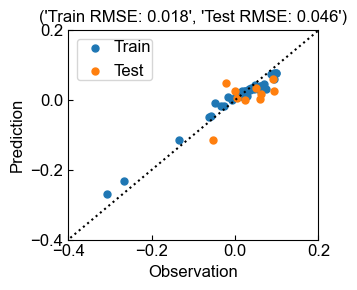

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(5)

X_train, X_test, y_train, y_test = train_test_split(X_input_norm, y_PCE, test_size=0.2, random_state=1)

gb_regressor = GradientBoostingRegressor(max_depth = 4,
                                         n_estimators=20)

# Fit to the training set
gb_regressor.fit(X_train, y_train)
# Perform predictions on both training and test sets
y_train_pred = gb_regressor.predict(X_train)
y_test_pred = gb_regressor.predict(X_test)

# Visualize the results
prediction_vs_ground_truth_fig(y_train, y_train_pred, y_test, y_test_pred)

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

rmse_train_pred_list = []
rmse_test_pred_list = []
mae_train_pred_list = []
mae_test_pred_list = []
mape_train_pred_list = []
mape_test_pred_list = []
y_train_pred_list = []
y_test_pred_list = []
y_pred_list = []

for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X_input_norm, y_PCE, test_size=0.2)
    gb_reg = GradientBoostingRegressor(n_estimators=20, max_depth=4)
    gb_reg.fit(X_train, y_train)
    y_train_pred =  gb_reg.predict(X_train)
    y_test_pred = gb_reg.predict(X_test)
    y_pred = gb_reg.predict(X_input_norm)
    
    y_train_pred_list.append(y_train_pred)
    y_test_pred_list.append(y_test_pred)
    y_pred_list.append(y_pred)
    
    rmse_train_value = np.sqrt(mse(y_train, y_train_pred))
    rmse_test_value = np.sqrt(mse(y_test, y_test_pred))
    rmse_train_pred_list.append(rmse_train_value)
    rmse_test_pred_list.append(rmse_test_value)

    mae_train_value = mae(y_train, y_train_pred)
    mae_test_value = mae(y_test, y_test_pred)
    mae_train_pred_list.append(mae_train_value)
    mae_test_pred_list.append(mae_test_value)

    mape_train_value = mape(y_train, y_train_pred)
    mape_test_value = mape(y_test, y_test_pred)
    mape_train_pred_list.append(mape_train_value)
    mape_test_pred_list.append(mape_test_value)

print('RMSE Train: ',np.around(np.mean(rmse_train_pred_list),3))
print('RMSE Test: ',np.around(np.mean(rmse_test_pred_list),3))
print('^'*20)
print('MAE Train: ',np.around(np.mean(mae_train_pred_list),3))
print('MAE Test: ',np.around(np.mean(mae_test_pred_list),3))
print('^'*20)
print('norm. MAE Train: ',np.around(np.mean(mae_train_pred_list)/(max(y_PCE)-min(y_PCE)),3))
print('norm. MAE Test: ',np.around(np.mean(mae_test_pred_list)/(max(y_PCE)-min(y_PCE)),3))
print('^'*20)

print('RMSE std Train: ',np.around(np.std(rmse_train_pred_list),3))
print('RMSE std Test: ',np.around(np.std(rmse_test_pred_list),3))
print('^'*20)
print('MAE std Train: ',np.around(np.std(mae_train_pred_list),3))
print('MAE std Test: ',np.around(np.std(mae_test_pred_list),3))

RMSE Train:  0.023
RMSE Test:  0.067
^^^^^^^^^^^^^^^^^^^^
MAE Train:  0.019
MAE Test:  0.049
^^^^^^^^^^^^^^^^^^^^
norm. MAE Train:  0.046
norm. MAE Test:  0.121
^^^^^^^^^^^^^^^^^^^^
RMSE std Train:  0.003
RMSE std Test:  0.03
^^^^^^^^^^^^^^^^^^^^
MAE std Train:  0.003
MAE std Test:  0.017


### Support Vector Regression (SVR)

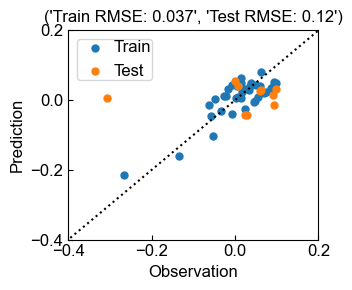

In [42]:
from sklearn.svm import SVR
np.random.seed(5)

X_train, X_test, y_train, y_test = train_test_split(X_input_norm, y_PCE, test_size=0.2)

sv_regressor = SVR(C=10, epsilon=0.05)

# Fit to the training set
sv_regressor.fit(X_train, y_train)
# Perform predictions on both training and test sets
y_train_hat = sv_regressor.predict(X_train)
y_test_hat = sv_regressor.predict(X_test)

# Visualize the results
prediction_vs_ground_truth_fig(y_train, y_train_hat, y_test, y_test_hat)

In [43]:
from sklearn.svm import SVR

rmse_train_pred_list = []
rmse_test_pred_list = []
mae_train_pred_list = []
mae_test_pred_list = []
mape_train_pred_list = []
mape_test_pred_list = []
y_train_pred_list = []
y_test_pred_list = []
y_pred_list = []

for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X_input_norm, y_PCE, test_size=0.2)
    svr_reg = SVR(C=10, epsilon=0.05)
    svr_reg.fit(X_train, y_train)
    y_train_pred =  svr_reg.predict(X_train)
    y_test_pred = svr_reg.predict(X_test)
    y_pred = svr_reg.predict(X_input_norm)
    
    y_train_pred_list.append(y_train_pred)
    y_test_pred_list.append(y_test_pred)
    y_pred_list.append(y_pred)
    
    rmse_train_value = np.sqrt(mse(y_train, y_train_pred))
    rmse_test_value = np.sqrt(mse(y_test, y_test_pred))
    rmse_train_pred_list.append(rmse_train_value)
    rmse_test_pred_list.append(rmse_test_value)

    mae_train_value = mae(y_train, y_train_pred)
    mae_test_value = mae(y_test, y_test_pred)
    mae_train_pred_list.append(mae_train_value)
    mae_test_pred_list.append(mae_test_value)

    mape_train_value = mape(y_train, y_train_pred)
    mape_test_value = mape(y_test, y_test_pred)
    mape_train_pred_list.append(mape_train_value)
    mape_test_pred_list.append(mape_test_value)

print('RMSE Train: ',np.around(np.mean(rmse_train_pred_list),3))
print('RMSE Test: ',np.around(np.mean(rmse_test_pred_list),3))
print('^'*20)
print('MAE Train: ',np.around(np.mean(mae_train_pred_list),3))
print('MAE Test: ',np.around(np.mean(mae_test_pred_list),3))
print('^'*20)
print('norm. MAE Train: ',np.around(np.mean(mae_train_pred_list)/(max(y_PCE)-min(y_PCE)),3))
print('norm. MAE Test: ',np.around(np.mean(mae_test_pred_list)/(max(y_PCE)-min(y_PCE)),3))
print('^'*20)

print('RMSE std Train: ',np.around(np.std(rmse_train_pred_list),3))
print('RMSE std Test: ',np.around(np.std(rmse_test_pred_list),3))
print('^'*20)
print('MAE std Train: ',np.around(np.std(mae_train_pred_list),3))
print('MAE std Test: ',np.around(np.std(mae_test_pred_list),3))

RMSE Train:  0.04
RMSE Test:  0.074
^^^^^^^^^^^^^^^^^^^^
MAE Train:  0.036
MAE Test:  0.057
^^^^^^^^^^^^^^^^^^^^
norm. MAE Train:  0.089
norm. MAE Test:  0.139
^^^^^^^^^^^^^^^^^^^^
RMSE std Train:  0.002
RMSE std Test:  0.022
^^^^^^^^^^^^^^^^^^^^
MAE std Train:  0.002
MAE std Test:  0.013


### Neural Network (NN) Regerssion 

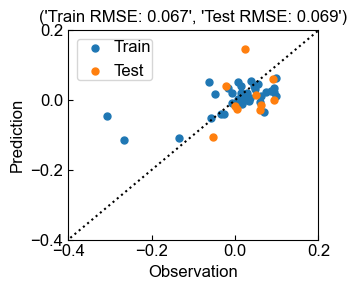

In [87]:
from sklearn.neural_network import MLPRegressor
#np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(X_input_norm, y_PCE, test_size=0.2, random_state=1)

nn_regressor = MLPRegressor(hidden_layer_sizes = [32, 64, 32], alpha = 0.01, activation = 'relu',
                     max_iter = 5000, solver='sgd',verbose=False, 
                     tol=1e-6)
# Fit to the training set
nn_regressor.fit(X_train, y_train)
# Perform predictions on both training and test sets
y_train_pred = nn_regressor.predict(X_train)
y_test_pred = nn_regressor.predict(X_test)

# Visualize the results
prediction_vs_ground_truth_fig(y_train, y_train_pred, y_test, y_test_pred)

In [62]:
from sklearn.neural_network import MLPRegressor

rmse_train_pred_list = []
rmse_test_pred_list = []
mae_train_pred_list = []
mae_test_pred_list = []
mape_train_pred_list = []
mape_test_pred_list = []
y_train_pred_list = []
y_test_pred_list = []
y_pred_list = []

for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X_input_norm, y_PCE, test_size=0.2)
    nn_reg = MLPRegressor(hidden_layer_sizes = [32,64,32], alpha = 0.01, activation = 'relu',
                     max_iter = 5000, solver='sgd',verbose=False,
                     tol=1e-6)
    nn_reg.fit(X_train, y_train)
    y_train_pred =  nn_reg.predict(X_train)
    y_test_pred = nn_reg.predict(X_test)
    y_pred = nn_reg.predict(X_input_norm)
    
    y_train_pred_list.append(y_train_pred)
    y_test_pred_list.append(y_test_pred)
    y_pred_list.append(y_pred)
    
    rmse_train_value = np.sqrt(mse(y_train, y_train_pred))
    rmse_test_value = np.sqrt(mse(y_test, y_test_pred))
    rmse_train_pred_list.append(rmse_train_value)
    rmse_test_pred_list.append(rmse_test_value)

    mae_train_value = mae(y_train, y_train_pred)
    mae_test_value = mae(y_test, y_test_pred)
    mae_train_pred_list.append(mae_train_value)
    mae_test_pred_list.append(mae_test_value)

    mape_train_value = mape(y_train, y_train_pred)
    mape_test_value = mape(y_test, y_test_pred)
    mape_train_pred_list.append(mape_train_value)
    mape_test_pred_list.append(mape_test_value)

print('RMSE Train: ',np.around(np.mean(rmse_train_pred_list),3))
print('RMSE Test: ',np.around(np.mean(rmse_test_pred_list),3))
print('^'*20)
print('MAE Train: ',np.around(np.mean(mae_train_pred_list),3))
print('MAE Test: ',np.around(np.mean(mae_test_pred_list),3))
print('^'*20)
print('norm. MAE Train: ',np.around(np.mean(mae_train_pred_list)/(max(y_PCE)-min(y_PCE)),3))
print('norm. MAE Test: ',np.around(np.mean(mae_test_pred_list)/(max(y_PCE)-min(y_PCE)),3))
print('^'*20)

print('RMSE std Train: ',np.around(np.std(rmse_train_pred_list),3))
print('RMSE std Test: ',np.around(np.std(rmse_test_pred_list),3))
print('^'*20)
print('MAE std Train: ',np.around(np.std(mae_train_pred_list),3))
print('MAE std Test: ',np.around(np.std(mae_test_pred_list),3))

RMSE Train:  0.075
RMSE Test:  0.084
^^^^^^^^^^^^^^^^^^^^
MAE Train:  0.055
MAE Test:  0.062
^^^^^^^^^^^^^^^^^^^^
norm. MAE Train:  0.135
norm. MAE Test:  0.154
^^^^^^^^^^^^^^^^^^^^
RMSE std Train:  0.02
RMSE std Test:  0.034
^^^^^^^^^^^^^^^^^^^^
MAE std Train:  0.016
MAE std Test:  0.022


### Gaussian Process (GP) Regerssion

reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


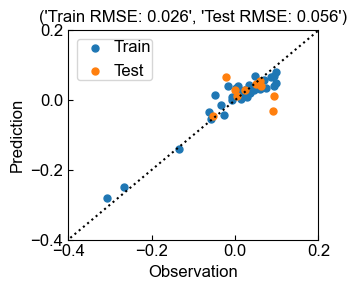

In [46]:
from GPy.models import GPRegression

np.random.seed(5)

X_train, X_test, y_train, y_test = train_test_split(X_input_norm, y_PCE, test_size=0.2, random_state=1)

input_dim = len(X_train.values[0])
ker = GPy.kern.Matern52(input_dim = input_dim, ARD =True)#
ker.lengthscale.constrain_bounded(1e-2, 10)
ker.variance.constrain_bounded(1e-2, 1000)
gpy_regr = GPRegression(X_train.values,y_train.values.reshape(-1,1), ker)#Emukit is a minimization tool; need to make Y negative  
gpy_regr.randomize()
gpy_regr.optimize_restarts(num_restarts=10,verbose =False, messages=False)

y_pred_train, y_uncer_train= gpy_regr.predict(np.array(X_train.values))
y_pred_test, y_uncer_test = gpy_regr.predict(np.array(X_test.values))
y_pred_train = y_pred_train
y_pred_test = y_pred_test

prediction_vs_ground_truth_fig(y_train, y_pred_train, y_test, y_pred_test)

In [47]:
from GPy.models import GPRegression

rmse_train_pred_list = []
rmse_test_pred_list = []
mae_train_pred_list = []
mae_test_pred_list = []
mape_train_pred_list = []
mape_test_pred_list = []
y_train_pred_list = []
y_test_pred_list = []
y_pred_list = []

for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X_input_norm, y_PCE, test_size=0.2)
    input_dim = len(X_train.values[0])
    ker = GPy.kern.Matern52(input_dim = input_dim, ARD =True)#
    ker.lengthscale.constrain_bounded(1e-2, 10)
    ker.variance.constrain_bounded(1e-2, 1000)
    gpy_regr = GPRegression(X_train.values,y_train.values.reshape(-1,1), ker)#Emukit is a minimization tool; need to make Y negative  
    gpy_regr.randomize()
    gpy_regr.optimize_restarts(num_restarts=10,verbose =False, messages=False)
 
    y_train_pred, y_uncer_train= gpy_regr.predict(np.array(X_train.values))
    y_test_pred, y_uncer_test = gpy_regr.predict(np.array(X_test.values))
    y_pred, y_uncer_test = gpy_regr.predict(np.array(X_input_norm.values))

    y_pred_list.append(y_pred)
    
    rmse_train_value = np.sqrt(mse(y_train, y_train_pred))
    rmse_test_value = np.sqrt(mse(y_test, y_test_pred))
    rmse_train_pred_list.append(rmse_train_value)
    rmse_test_pred_list.append(rmse_test_value)

    mae_train_value = mae(y_train, y_train_pred)
    mae_test_value = mae(y_test, y_test_pred)
    mae_train_pred_list.append(mae_train_value)
    mae_test_pred_list.append(mae_test_value)

    mape_train_value = mape(y_train, y_train_pred)
    mape_test_value = mape(y_test, y_test_pred)
    mape_train_pred_list.append(mape_train_value)
    mape_test_pred_list.append(mape_test_value)

print('RMSE Train: ',np.around(np.mean(rmse_train_pred_list),3))
print('RMSE Test: ',np.around(np.mean(rmse_test_pred_list),3))
print('^'*20)
print('MAE Train: ',np.around(np.mean(mae_train_pred_list),3))
print('MAE Test: ',np.around(np.mean(mae_test_pred_list),3))
print('^'*20)
print('norm. MAE Train: ',np.around(np.mean(mae_train_pred_list)/(max(y_PCE)-min(y_PCE)),3))
print('norm. MAE Test: ',np.around(np.mean(mae_test_pred_list)/(max(y_PCE)-min(y_PCE)),3))
print('^'*20)

print('RMSE std Train: ',np.around(np.std(rmse_train_pred_list),3))
print('RMSE std Test: ',np.around(np.std(rmse_test_pred_list),3))
print('^'*20)
print('MAE std Train: ',np.around(np.std(mae_train_pred_list),3))
print('MAE std Test: ',np.around(np.std(mae_test_pred_list),3))

reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parame

reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameter

reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


RMSE Train:  0.031
RMSE Test:  0.068
^^^^^^^^^^^^^^^^^^^^
MAE Train:  0.024
MAE Test:  0.049
^^^^^^^^^^^^^^^^^^^^
norm. MAE Train:  0.058
norm. MAE Test:  0.122
^^^^^^^^^^^^^^^^^^^^
RMSE std Train:  0.006
RMSE std Test:  0.027
^^^^^^^^^^^^^^^^^^^^
MAE std Train:  0.005
MAE std Test:  0.017


### Ensemble Learning
Based on the prediction error, we chose RF, GB, SVR, NN, GP as the base learners, and the outputs of the base learner are used as inputs to a secondary meta-learner of RF model. 

reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


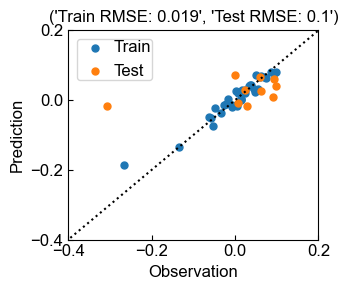

In [59]:
np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(X_input_norm, y_PCE, test_size = 0.2)
    
##*******************************************##
## Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb_regr = GradientBoostingRegressor(n_estimators=20, max_depth=4)#random_state=99#{‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}
gb_regr.fit(X_train,y_train)
##*******************************************##
## Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(n_estimators=20, max_depth=5)#random_state=200# criterion="squared_error",'absolute_error'
rf_regr.fit(X_train,y_train)
##*******************************************##
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
sv_regr = SVR(C=10, epsilon=0.05)#
sv_regr.fit(X_train, y_train)
##*********************************************##
## NN
from sklearn.neural_network import MLPRegressor
nn_reg = MLPRegressor(hidden_layer_sizes = [32,64,32], 
                      alpha = 0.01, activation = 'relu',
                      max_iter = 5000, solver='sgd',verbose=False,
                      tol=1e-6)
nn_reg.fit(X_train, y_train)
##*******************************************##
import emukit
import GPy
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper
input_dim = len(X_train.values[0])
ker = GPy.kern.Matern52(input_dim = input_dim, 
                        ARD =True)#
ker.lengthscale.constrain_bounded(1e-2, 10)
ker.variance.constrain_bounded(1e-2, 1000)
gpy_regr = GPRegression(X_train.values,
                        y_train.values.reshape(-1,1), 
                        ker)
gpy_regr.randomize()
gpy_regr.optimize_restarts(num_restarts=10,
                           verbose =False, 
                           messages=False)
objective_model = GPyModelWrapper(gpy_regr)

def regr_pred(regr_list, X):
    y_regr_pred = []
    i = 0
    for regr in regr_list:
        y_regr_pred.append(regr(X).reshape(-1,1))
    return np.array(y_regr_pred)

def gpy_regr_predict(X, gp = objective_model):
    yc_pred, yc_uncer= gp.predict(np.array(X.values))
    return yc_pred.ravel()

regr_list = [gb_regr.predict, rf_regr.predict, 
             sv_regr.predict, nn_reg.predict, 
             gpy_regr_predict]
meta_reg_all = RandomForestRegressor(n_estimators=50, max_depth=3)
meta_reg_all.fit(np.transpose(regr_pred(regr_list, X_train)).reshape(-1,5), 
                 y_train.ravel())

y_pred_train = meta_reg_all.predict(np.transpose(regr_pred(regr_list, X_train)).reshape(-1,5))
y_pred_test = meta_reg_all.predict(np.transpose(regr_pred(regr_list, X_test)).reshape(-1,5))
y_pred = meta_reg_all.predict(np.transpose(regr_pred(regr_list, X_input_norm)).reshape(-1,5))

prediction_vs_ground_truth_fig(y_train, y_pred_train, y_test, y_pred_test)


In [60]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from GPy.models import GPRegression

y_pred_test_list = []

rmse_train_pred_list = []
rmse_test_pred_list = []
mae_train_pred_list = []
mae_test_pred_list = []
mape_train_pred_list = []
mape_test_pred_list = []
y_pred_list = []

for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X_input_norm, y_PCE, test_size = 0.2)
    
    ##*******************************************##
    ## Gradient Boosting
    from sklearn.ensemble import GradientBoostingRegressor
    gb_regr = GradientBoostingRegressor(n_estimators=20, max_depth=4)#random_state=99#{‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}
    gb_regr.fit(X_train,y_train)
    ##*******************************************##
    ## Random Forest
    from sklearn.ensemble import RandomForestRegressor
    rf_regr = RandomForestRegressor(n_estimators=20, max_depth=5)#random_state=200# criterion="squared_error",'absolute_error'
    rf_regr.fit(X_train,y_train)
    ##*******************************************##
    from sklearn.svm import SVR
    from sklearn.pipeline import make_pipeline
    sv_regr = SVR(C=10, epsilon=0.05)#
    sv_regr.fit(X_train, y_train)
    ##*********************************************##
    ## NN
    from sklearn.neural_network import MLPRegressor
    nn_reg = MLPRegressor(hidden_layer_sizes = [32,64,32], alpha = 0.01, activation = 'relu',
                     max_iter = 5000, solver='sgd',verbose=False,
                     tol=1e-6)
    nn_reg.fit(X_train, y_train)
    ##*******************************************##
    import emukit
    import GPy
    from GPy.models import GPRegression
    from emukit.model_wrappers import GPyModelWrapper
    input_dim = len(X_train.values[0])
    ker = GPy.kern.Matern52(input_dim = input_dim, ARD =True)#
    ker.lengthscale.constrain_bounded(1e-2, 10)
    ker.variance.constrain_bounded(1e-2, 1000)
    gpy_regr = GPRegression(X_train.values,y_train.values.reshape(-1,1), ker)
    gpy_regr.randomize()
    gpy_regr.optimize_restarts(num_restarts=10,verbose =False, messages=False)
    objective_model = GPyModelWrapper(gpy_regr)

    def regr_pred(regr_list, X):
        y_regr_pred = []
        i = 0
        for regr in regr_list:
            y_regr_pred.append(regr(X).reshape(-1,1))
        return np.array(y_regr_pred)

    def gpy_regr_predict(X, gp = objective_model):
        yc_pred, yc_uncer= gp.predict(np.array(X.values))
        return yc_pred.ravel()

    regr_list = [gb_regr.predict, rf_regr.predict, 
                 sv_regr.predict, nn_reg.predict, 
                 gpy_regr_predict]
    meta_reg_all = RandomForestRegressor(n_estimators=50, max_depth=3)
    meta_reg_all.fit(np.transpose(regr_pred(regr_list, X_train)).reshape(-1,5), 
                     y_train.ravel())
    
    y_pred_train = meta_reg_all.predict(np.transpose(regr_pred(regr_list, X_train)).reshape(-1,5))
    y_pred_test = meta_reg_all.predict(np.transpose(regr_pred(regr_list, X_test)).reshape(-1,5))
    y_pred = meta_reg_all.predict(np.transpose(regr_pred(regr_list, X_input_norm)).reshape(-1,5))

    y_pred_list.append(y_pred)
    
    rmse_train_value = np.sqrt(mse(y_train, y_pred_train))
    rmse_test_value = np.sqrt(mse(y_test, y_pred_test))
    rmse_train_pred_list.append(rmse_train_value)
    rmse_test_pred_list.append(rmse_test_value)

    mae_train_value = mae(y_train, y_pred_train)
    mae_test_value = mae(y_test, y_pred_test)
    mae_train_pred_list.append(mae_train_value)
    mae_test_pred_list.append(mae_test_value)

    mape_train_value = mape(y_train, y_pred_train)
    mape_test_value = mape(y_test, y_pred_test)
    mape_train_pred_list.append(mape_train_value)
    mape_test_pred_list.append(mape_test_value)

print('RMSE Train: ',np.around(np.mean(rmse_train_pred_list),3))
print('RMSE Test: ',np.around(np.mean(rmse_test_pred_list),3))
print('^'*20)
print('MAE Train: ',np.around(np.mean(mae_train_pred_list),3))
print('MAE Test: ',np.around(np.mean(mae_test_pred_list),3))
print('^'*20)
print('norm. MAE Train: ',np.around(np.mean(mae_train_pred_list)/(max(y_PCE)-min(y_PCE)),3))
print('norm. MAE Test: ',np.around(np.mean(mae_test_pred_list)/(max(y_PCE)-min(y_PCE)),3))
print('^'*20)

print('RMSE std Train: ',np.around(np.std(rmse_train_pred_list),3))
print('RMSE std Test: ',np.around(np.std(rmse_test_pred_list),3))
print('^'*20)
print('MAE std Train: ',np.around(np.std(mae_train_pred_list),3))
print('MAE std Test: ',np.around(np.std(mae_test_pred_list),3))

reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parame

reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameter

reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


RMSE Train:  0.015
RMSE Test:  0.068
^^^^^^^^^^^^^^^^^^^^
MAE Train:  0.011
MAE Test:  0.05
^^^^^^^^^^^^^^^^^^^^
norm. MAE Train:  0.028
norm. MAE Test:  0.123
^^^^^^^^^^^^^^^^^^^^
RMSE std Train:  0.003
RMSE std Test:  0.028
^^^^^^^^^^^^^^^^^^^^
MAE std Train:  0.002
MAE std Test:  0.016
